# 1. Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
from scipy.stats import chisquare
from scipy.stats import skew



# 2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/Oeson Capstone/Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

Mounted at /content/drive


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

# EDA

## Checking for null values

In [ ]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


## Statistical description of numerical values

In [ ]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_ID,5000,5000,EMP0001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5000.0,NaN,NaN,NaN,40.995,11.296021,22.0,31.0,41.0,51.0,60.0
Gender,5000,4,Female,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Role,5000,7,Project Manager,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,5000,7,Finance,747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years_of_Experience,5000.0,NaN,NaN,NaN,17.8102,10.020412,1.0,9.0,18.0,26.0,35.0
Work_Location,5000,3,Remote,1714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hours_Worked_Per_Week,5000.0,NaN,NaN,NaN,39.6146,11.860194,20.0,29.0,40.0,50.0,60.0
Number_of_Virtual_Meetings,5000.0,NaN,NaN,NaN,7.559,4.636121,0.0,4.0,8.0,12.0,15.0
Work_Life_Balance_Rating,5000.0,NaN,NaN,NaN,2.9842,1.410513,1.0,2.0,3.0,4.0,5.0


## Univariate analysis

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram


In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    Parameters:
    - data: DataFrame
    - feature: DataFrame column
    - perc: Whether to display percentages instead of count (default is False)
    - n: Displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Total number of occurrences
    count = data[feature].nunique()  # Number of unique categories

    if n is None:
        n = count  # Default to show all categories if n is not specified
    order = data[feature].value_counts(ascending=False).index[:n]  # Top n categories

    fig, ax = plt.subplots(figsize=(max(n*1.5, 10), 8))  # Adjust figure size based on n
    sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot

    for p in ax.patches:
        height = p.get_height()
        label = "{:.1f}%".format(100 * height / total) if perc else int(height)
        x = p.get_x() + p.get_width() / 2
        y = height + 0.01  # Slight offset above the bar

        ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12, color='black')

    plt.xticks(rotation=90, fontsize=15)
    plt.title(f'Distribution of {feature}')  # Optional title
    plt.show()

### Age

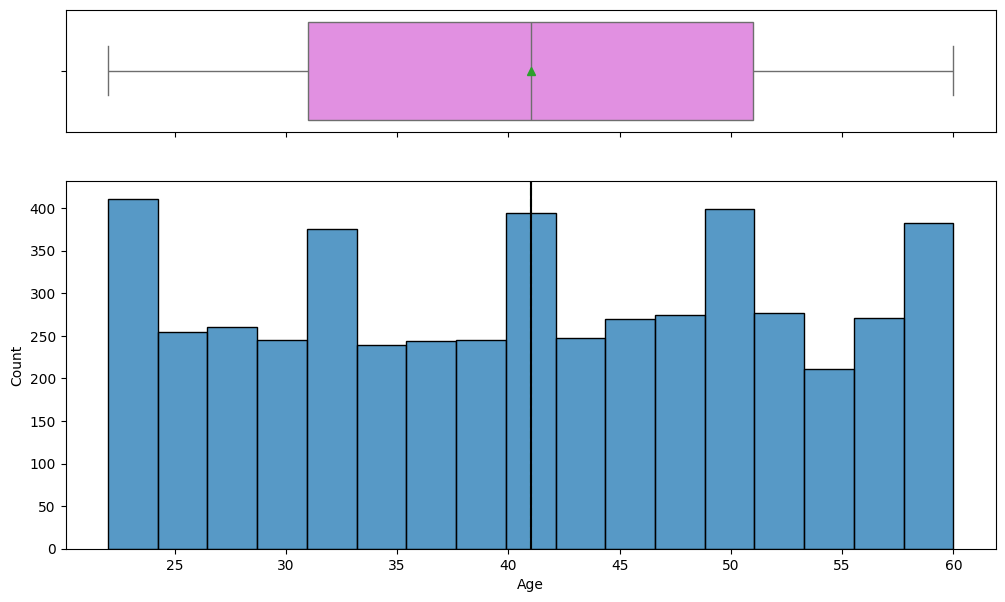

In [ ]:
histogram_boxplot(df,'Age')

### Years of experience


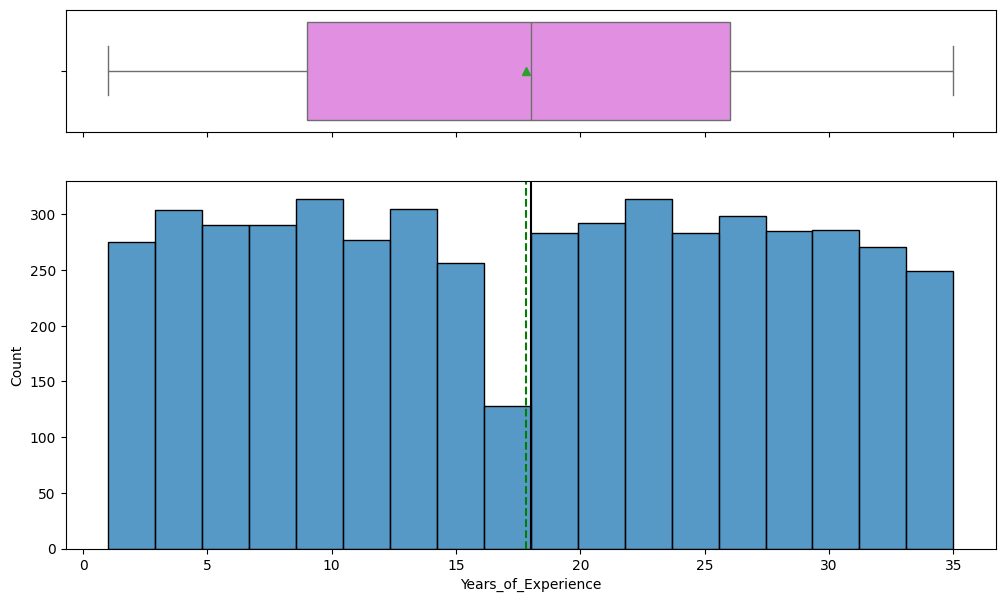

In [ ]:
histogram_boxplot(df,'Years_of_Experience')

### Hours Worked Per Week


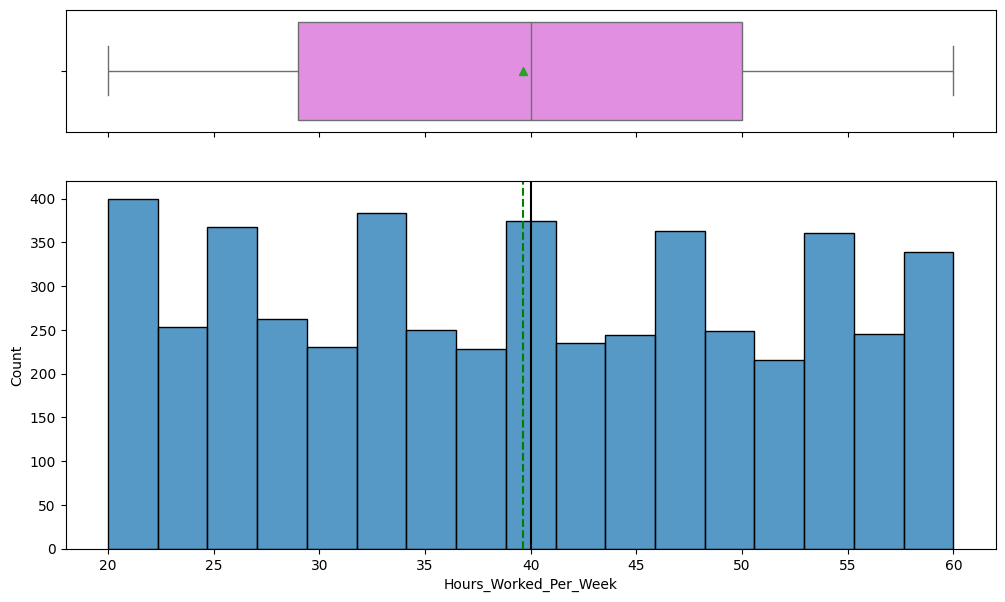

In [ ]:
histogram_boxplot(df,'Hours_Worked_Per_Week')

### Number of Virtual Meetings


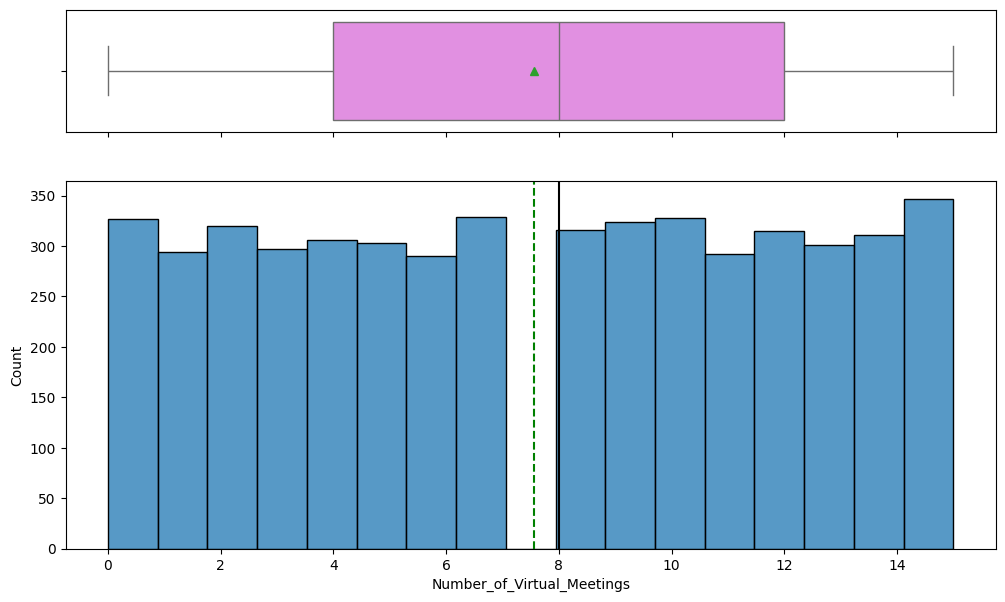

In [ ]:
histogram_boxplot(df,'Number_of_Virtual_Meetings')

### Work Life Balance Rating

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


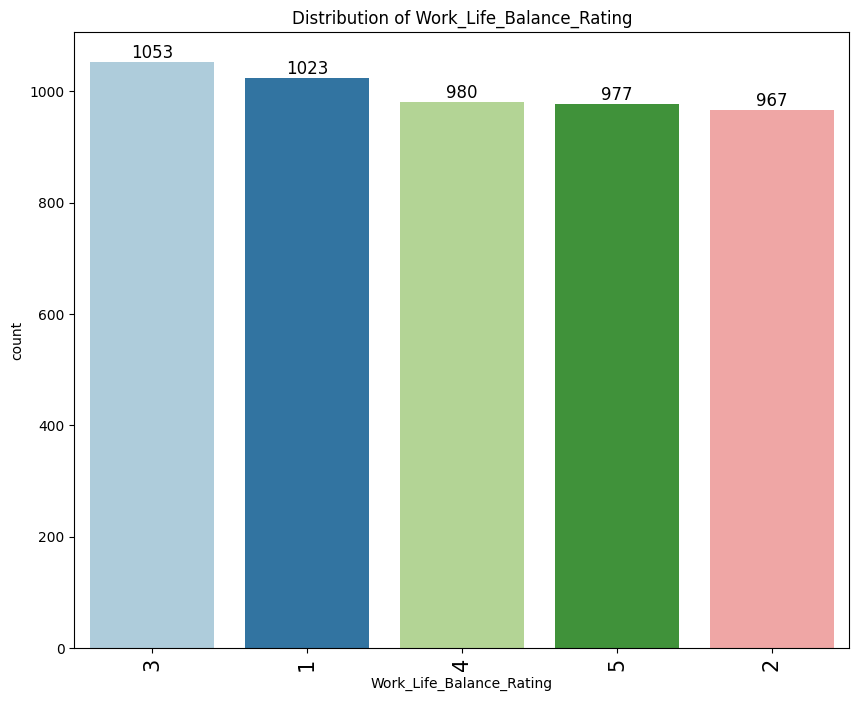

In [ ]:
labeled_barplot(df,'Work_Life_Balance_Rating')

### Gender

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


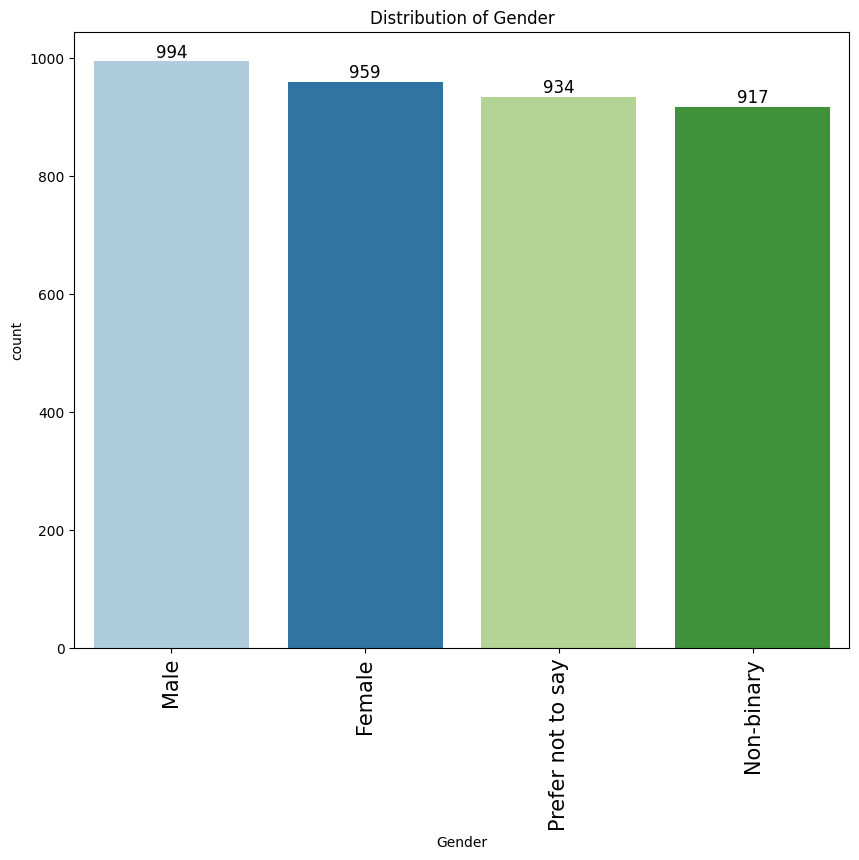

In [ ]:
labeled_barplot(df,'Gender')

### Job Role

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


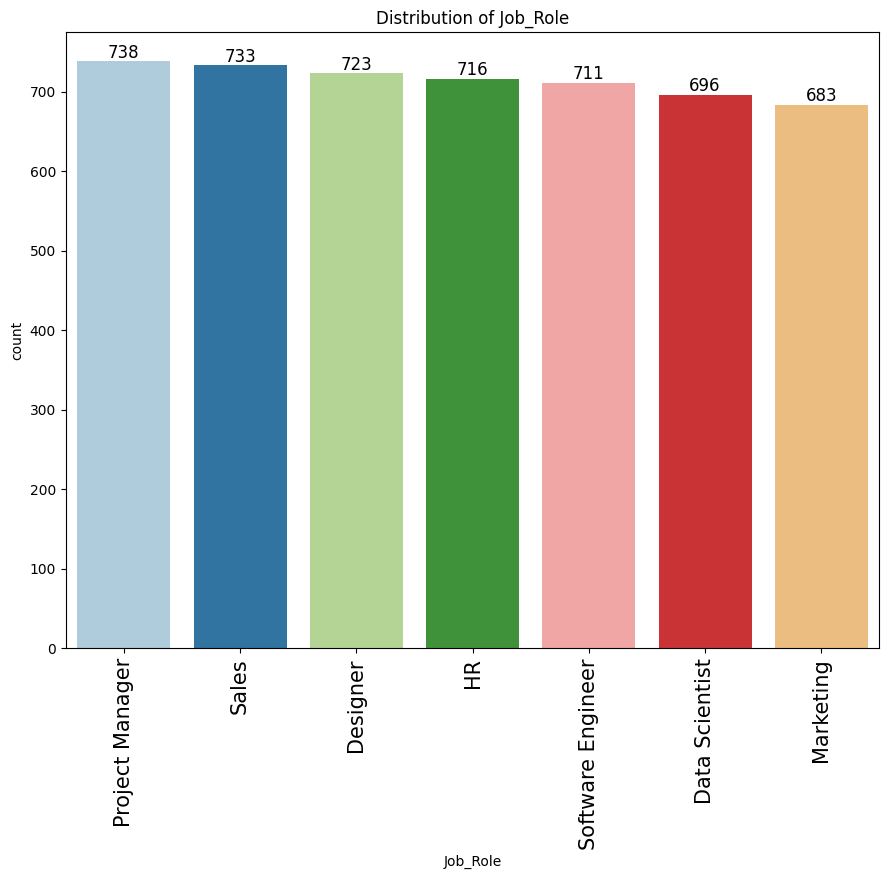

In [ ]:
labeled_barplot(df,'Job_Role')

### Industry

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


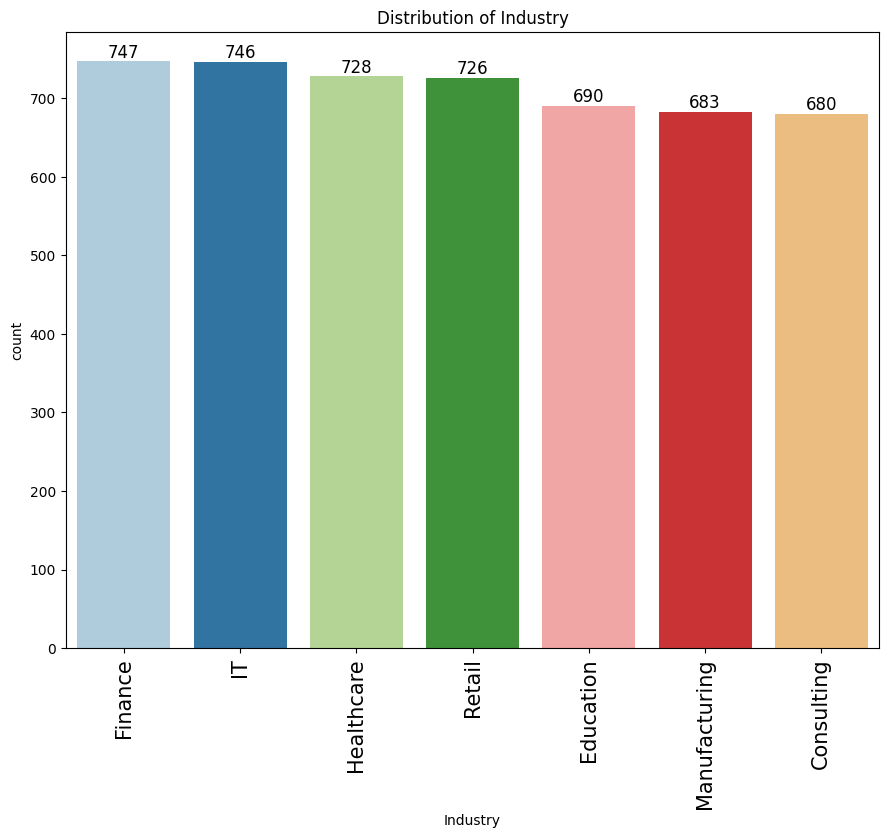

In [ ]:
labeled_barplot(df,'Industry')

### Work Location

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


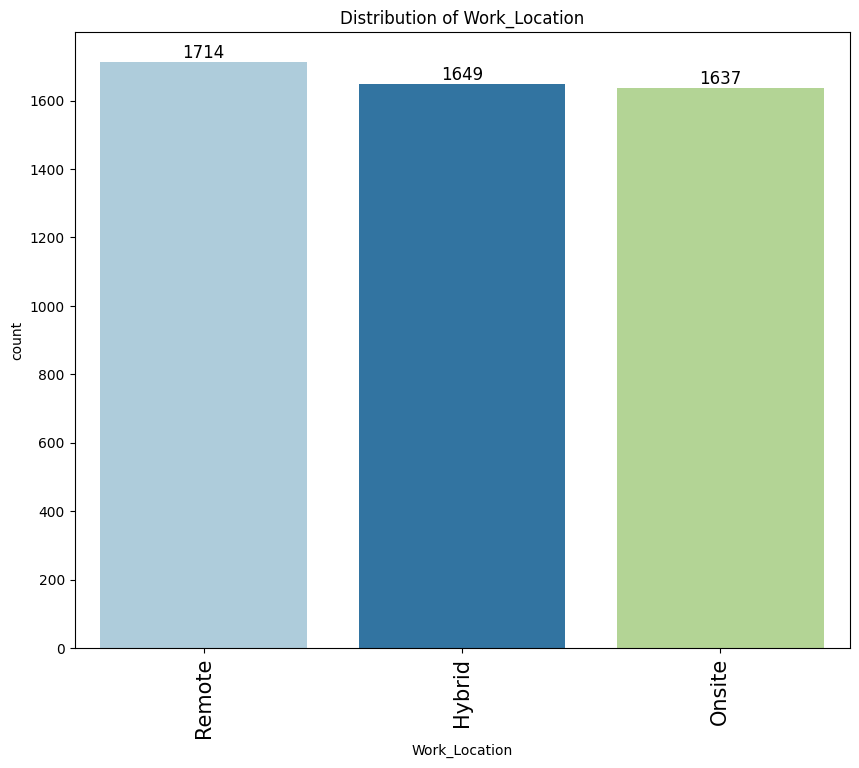

In [ ]:
labeled_barplot(df,'Work_Location')

### Stress Level

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


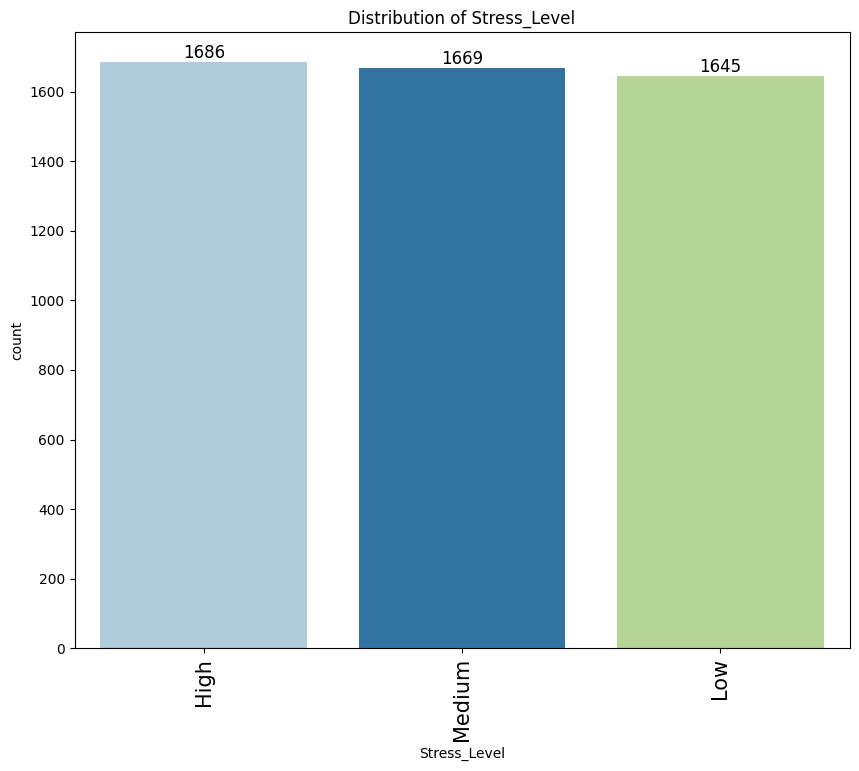

In [ ]:
labeled_barplot(df,'Stress_Level')

### Mental Health Condition

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


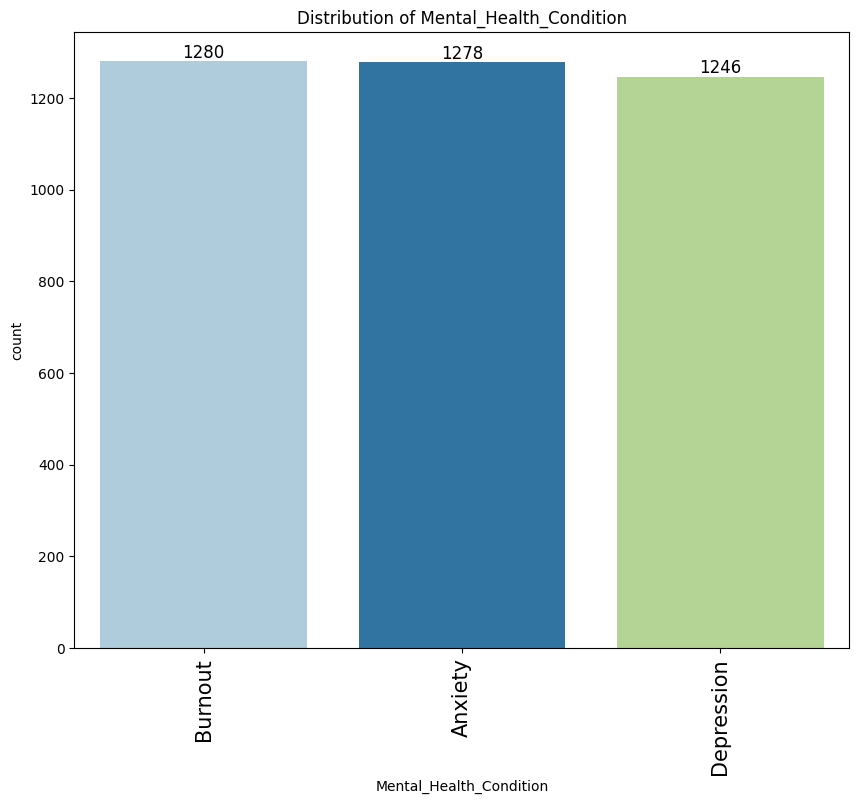

In [ ]:
labeled_barplot(df,'Mental_Health_Condition')

### Access to Mental Health Resources

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


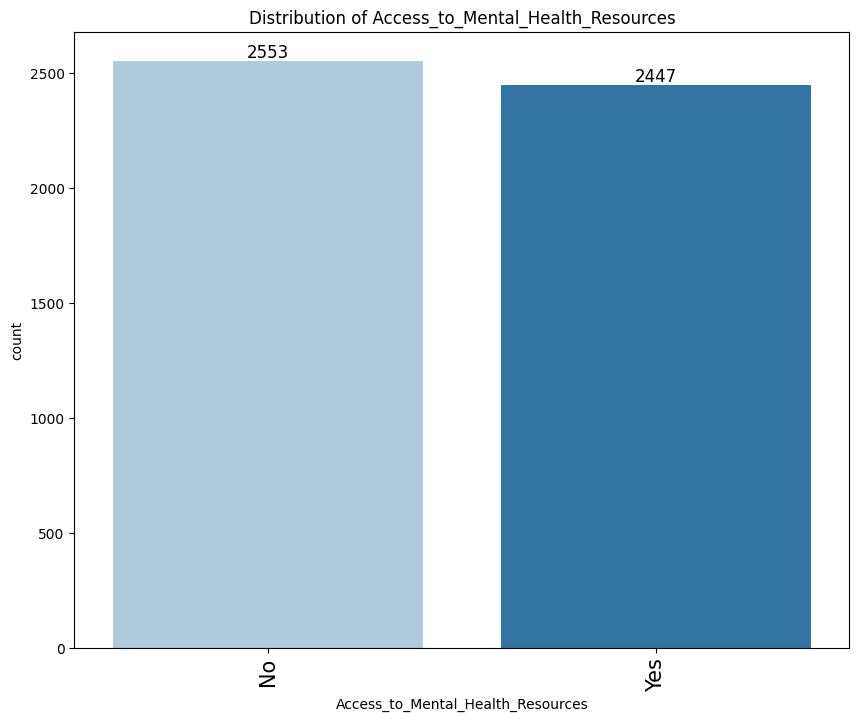

In [ ]:
labeled_barplot(df,'Access_to_Mental_Health_Resources')

### Productivity Change

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


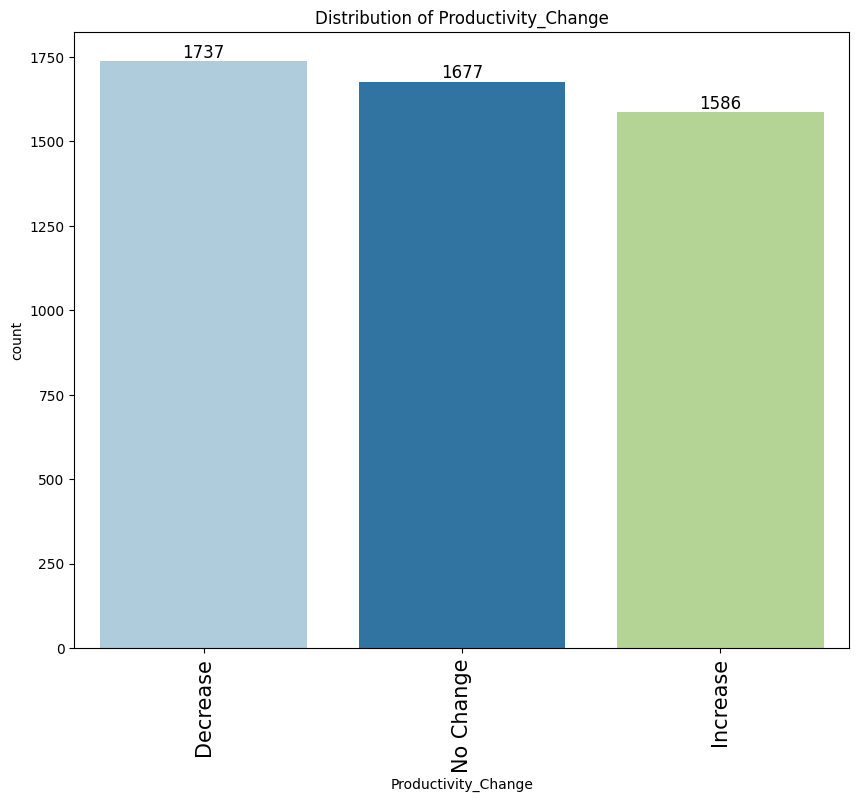

In [ ]:
labeled_barplot(df,'Productivity_Change')

### Social Isolation Rating

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


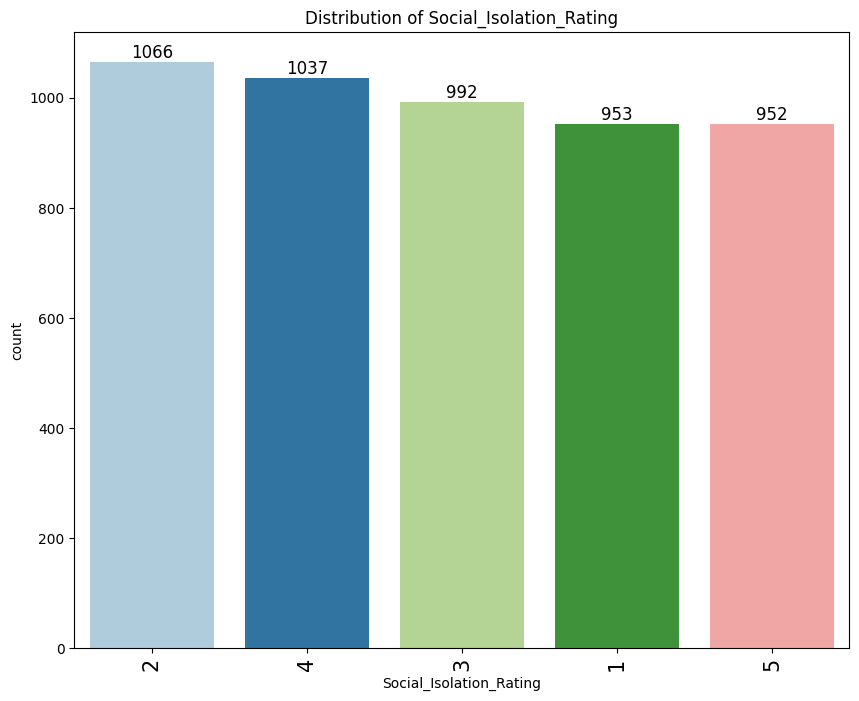

In [ ]:
labeled_barplot(df,'Social_Isolation_Rating')

### Satisfaction_with_Remote_Work

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


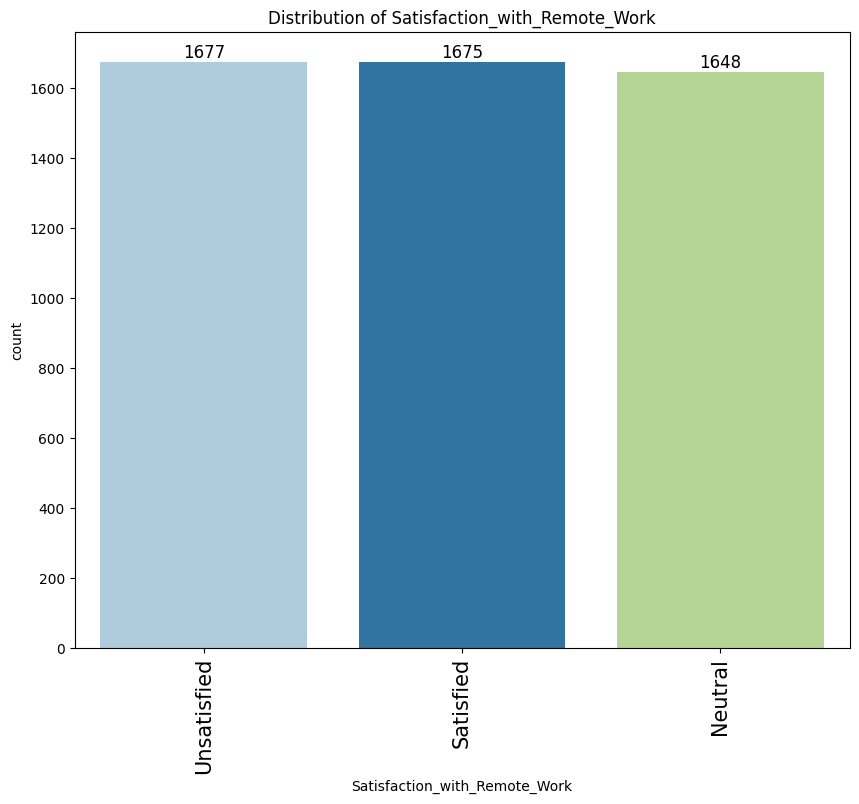

In [ ]:
labeled_barplot(df,'Satisfaction_with_Remote_Work')

### Company_Support_for_Remote_Work

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


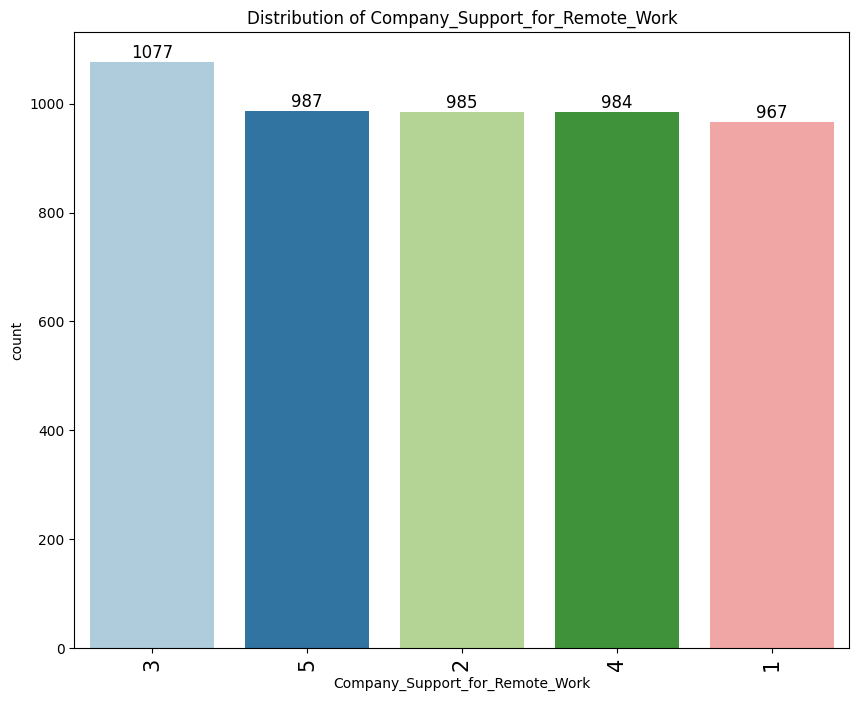

In [ ]:
labeled_barplot(df,'Company_Support_for_Remote_Work')

### Physical_Activity

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


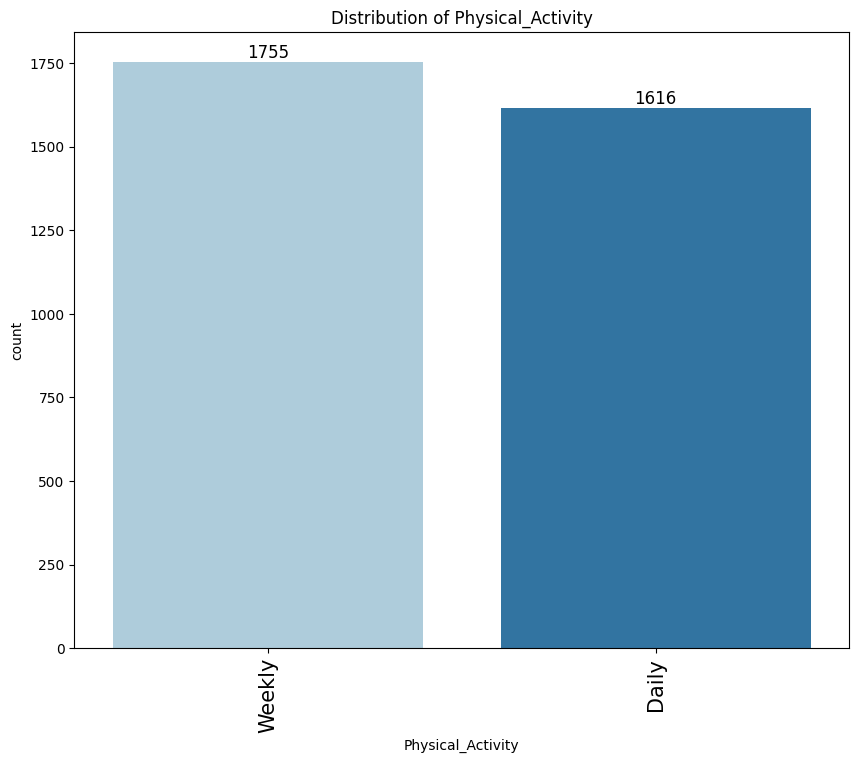

In [ ]:
labeled_barplot(df,'Physical_Activity')

### Sleep_Quality

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


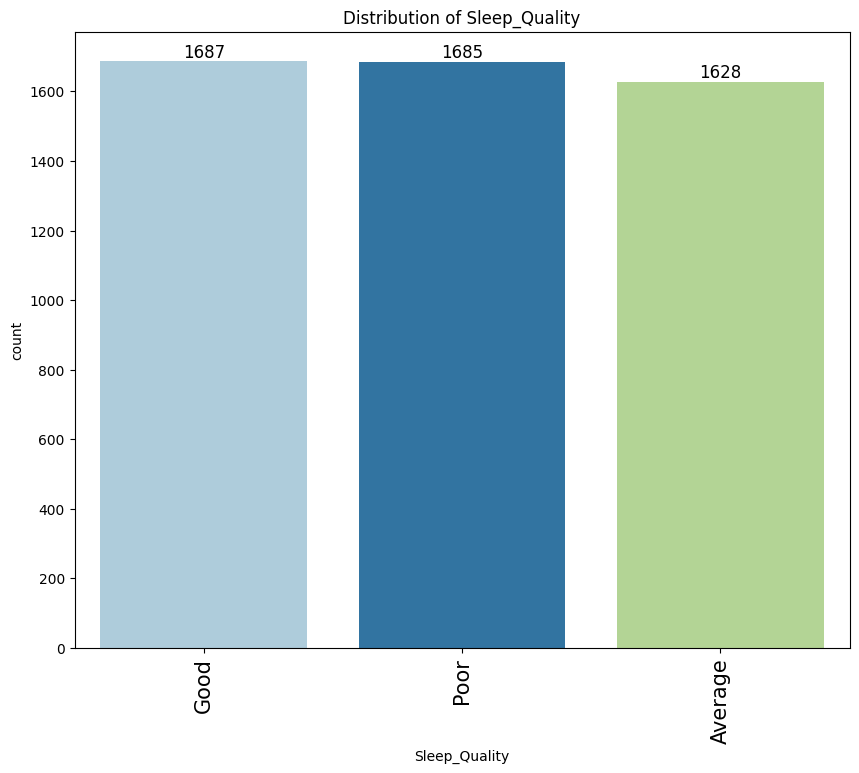

In [ ]:
labeled_barplot(df,'Sleep_Quality')

### Region

<ipython-input-7-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


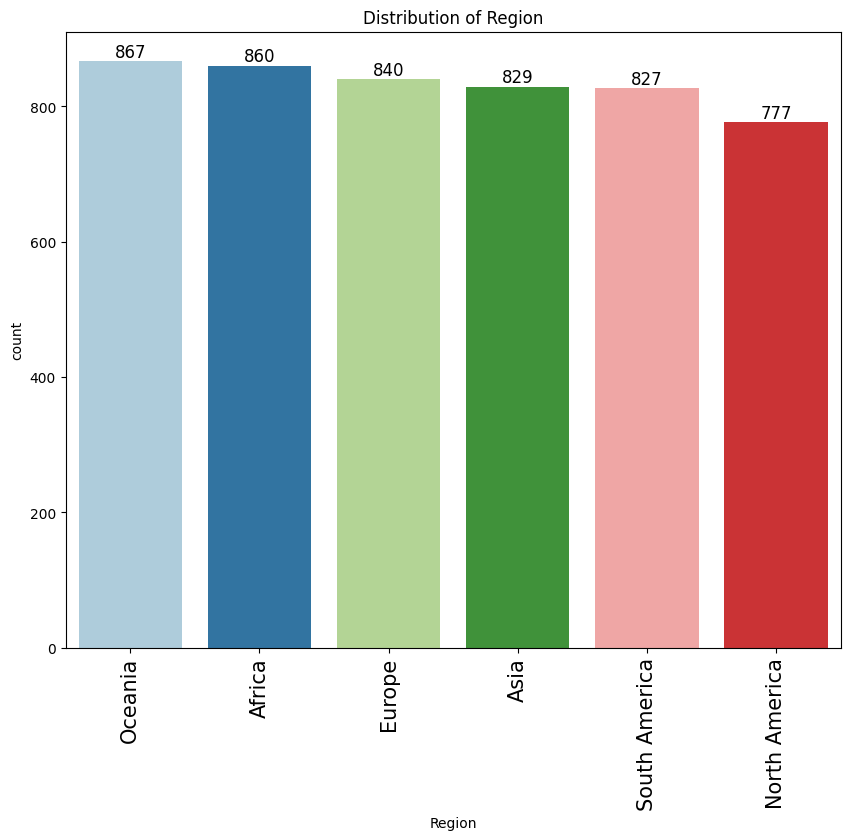

In [ ]:
labeled_barplot(df,'Region')

## Bi Variate Analysis

### Heat Map

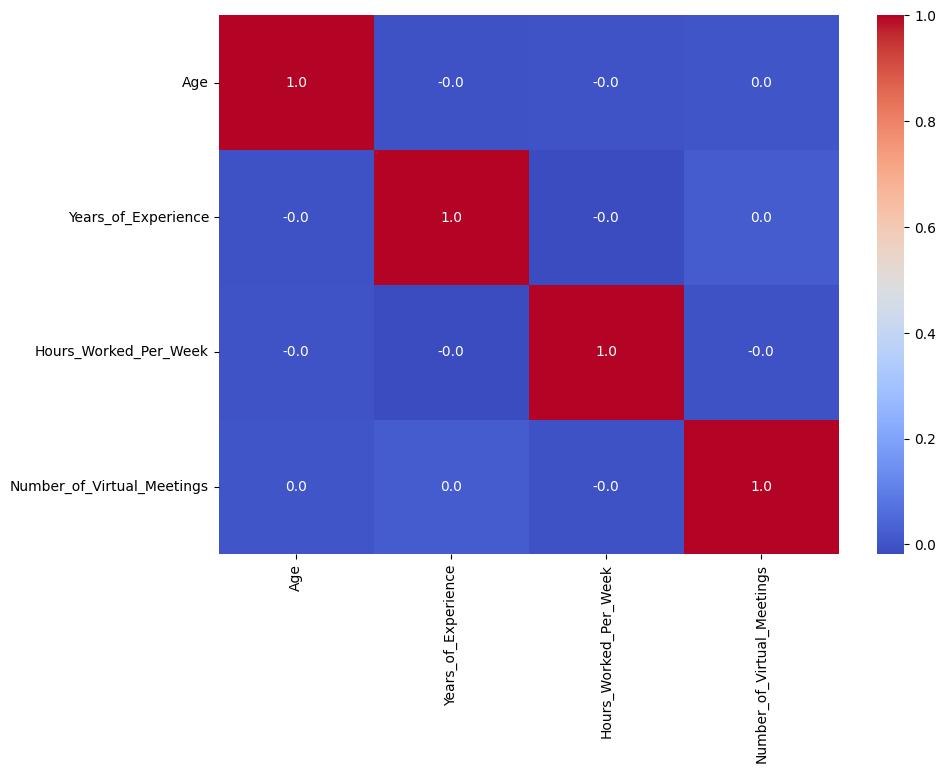

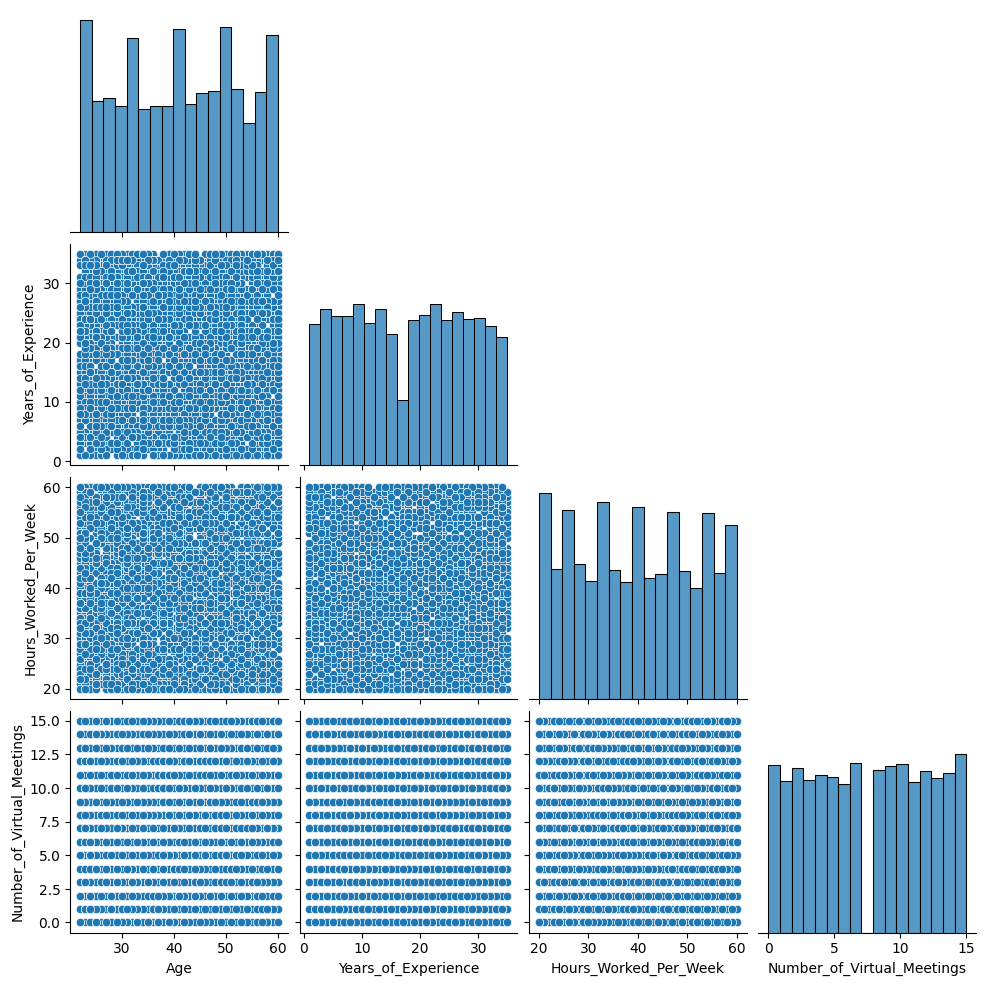

In [ ]:
# Check for correlation among numerical variables
num_var = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            fmt = ".1f",
            xticklabels = corr.columns,
            yticklabels = corr.columns);

sns.pairplot(df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week','Number_of_Virtual_Meetings']], corner=True);

No relationships between variables

###  Influence of Job Role and Industry in Stress levels

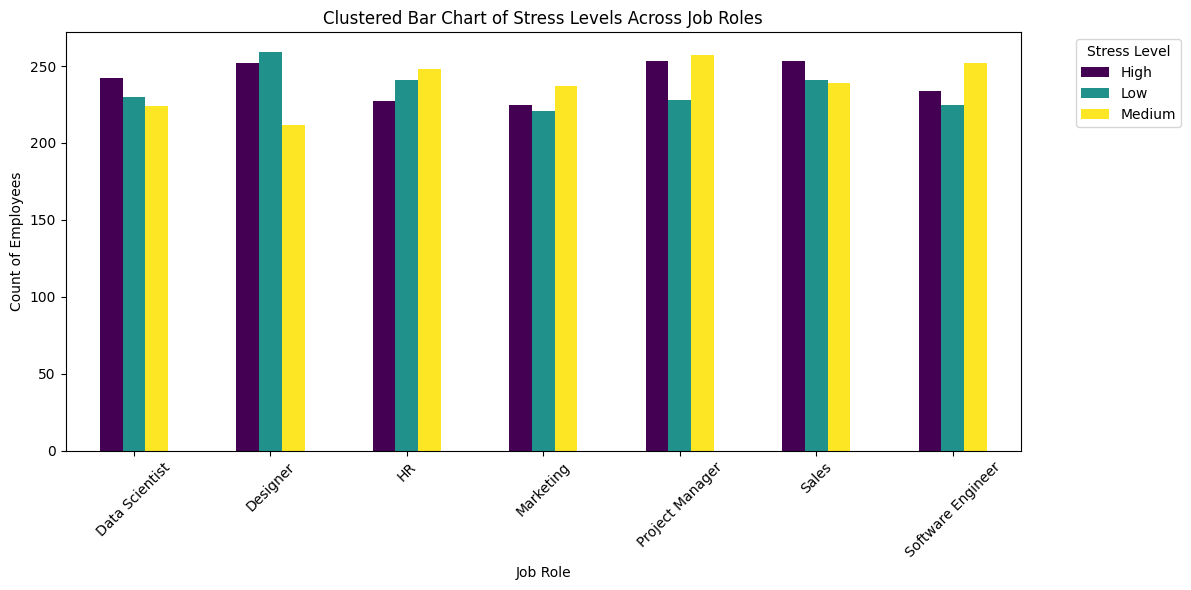

In [ ]:
# Preparing data for a clustered bar chart with stress levels vs job roles
job_stress_clustered = df.groupby(['Job_Role', 'Stress_Level']).size().unstack(fill_value=0)

# Plotting the clustered bar chart
job_stress_clustered.plot(kind='bar', figsize=(12, 6), colormap="viridis")

# Adding titles and labels
plt.title("Clustered Bar Chart of Stress Levels Across Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count of Employees")
plt.legend(title="Stress Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

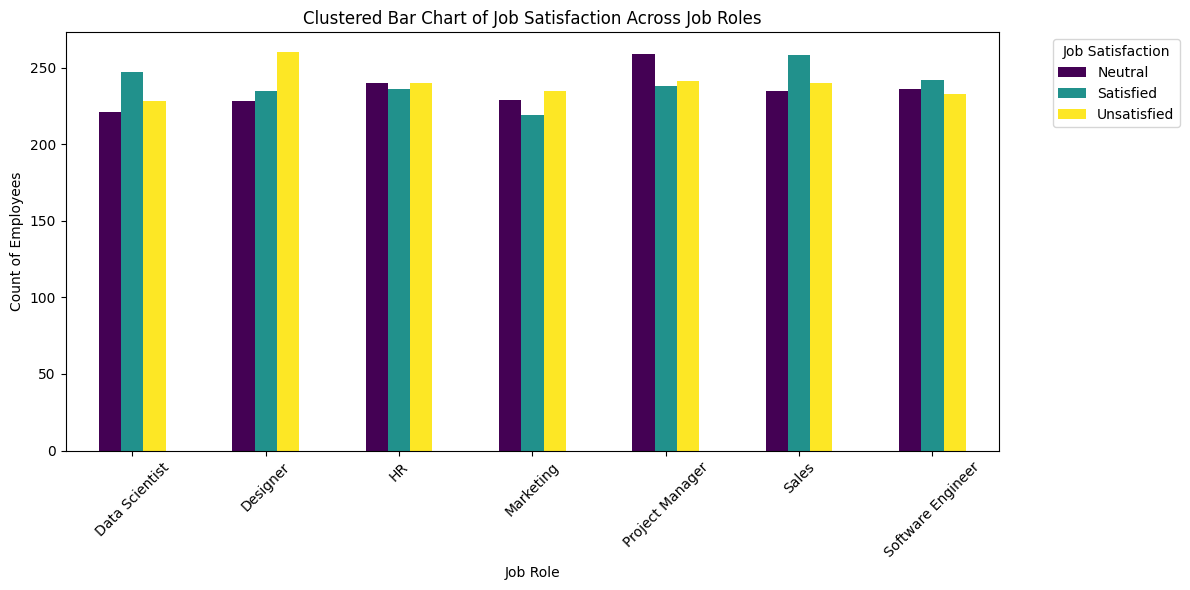

In [ ]:
# Preparing data for a clustered bar chart
job_satisfaction_clustered = df.groupby(['Job_Role', 'Satisfaction_with_Remote_Work']).size().unstack(fill_value=0)

# Plotting the clustered bar chart
job_satisfaction_clustered.plot(kind='bar', figsize=(12, 6), colormap="viridis")

# Adding titles and labels
plt.title("Clustered Bar Chart of Job Satisfaction Across Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count of Employees")
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

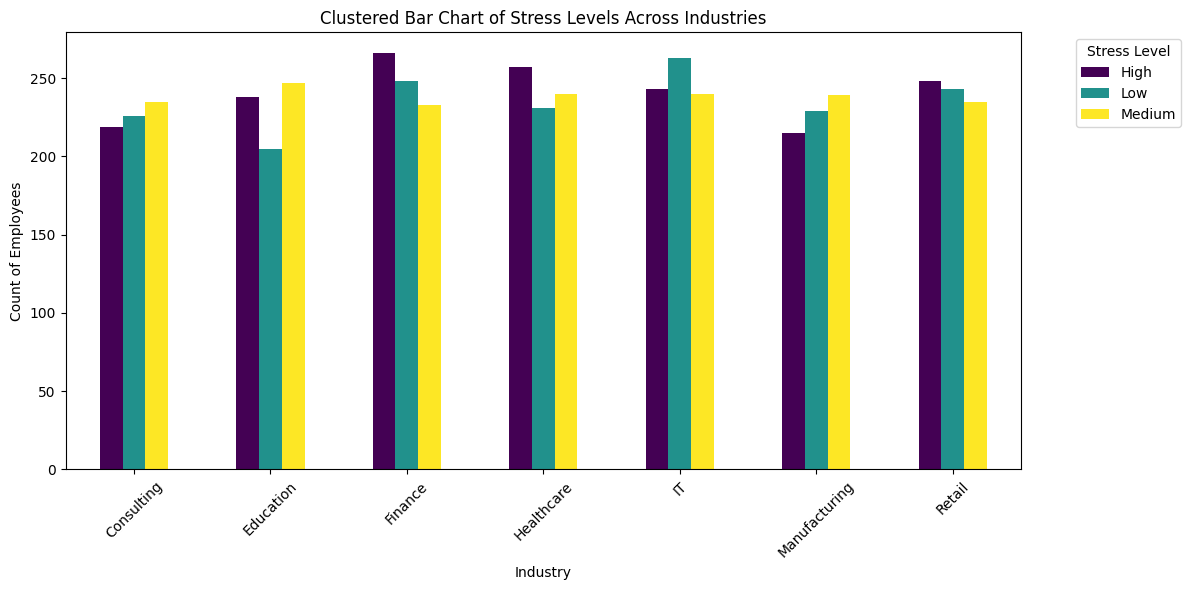

In [ ]:
# Preparing data for a clustered bar chart with stress levels vs industry
stress_industry_clustered = df.groupby(['Industry', 'Stress_Level']).size().unstack(fill_value=0)

# Plotting the clustered bar chart for stress levels vs industry
stress_industry_clustered.plot(kind='bar', figsize=(12, 6), colormap="viridis")

# Adding titles and labels
plt.title("Clustered Bar Chart of Stress Levels Across Industries")
plt.xlabel("Industry")
plt.ylabel("Count of Employees")
plt.legend(title="Stress Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

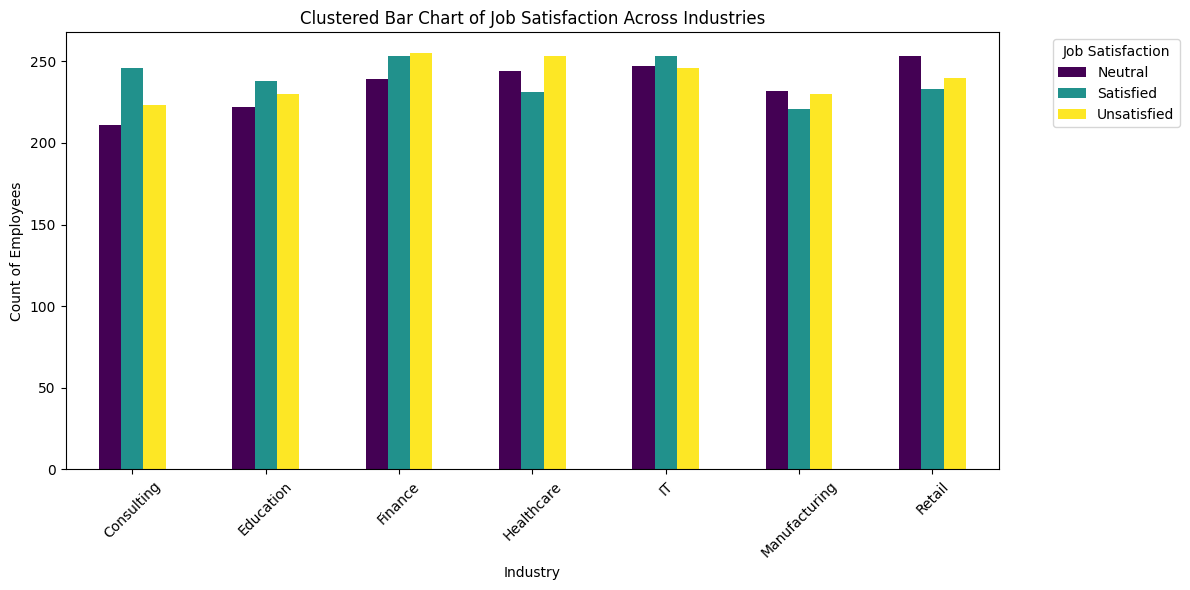

In [ ]:
# Preparing data for a clustered bar chart with job satisfaction vs industry
satisfaction_industry_clustered = df.groupby(['Industry', 'Satisfaction_with_Remote_Work']).size().unstack(fill_value=0)

# Plotting the clustered bar chart for job satisfaction vs industry
satisfaction_industry_clustered.plot(kind='bar', figsize=(12, 6), colormap="viridis")

# Adding titles and labels
plt.title("Clustered Bar Chart of Job Satisfaction Across Industries")
plt.xlabel("Industry")
plt.ylabel("Count of Employees")
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ### Relationship Between Social Isolation and Job Satisfaction

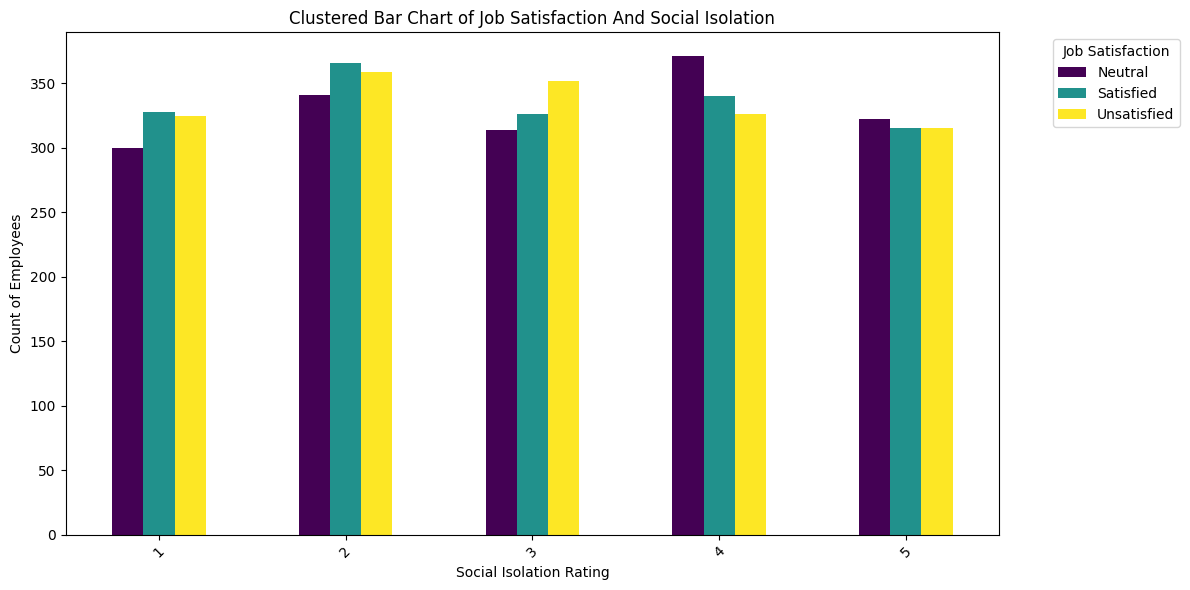

In [ ]:
# Preparing data for a clustered bar chart with job satisfaction vs industry
satisfaction_Isolation_clustered = df.groupby(['Social_Isolation_Rating', 'Satisfaction_with_Remote_Work']).size().unstack(fill_value=0)

# Plotting the clustered bar chart for job satisfaction vs industry
satisfaction_Isolation_clustered.plot(kind='bar', figsize=(12, 6), colormap="viridis")

# Adding titles and labels
plt.title("Clustered Bar Chart of Job Satisfaction And Social Isolation")
plt.xlabel("Social Isolation Rating")
plt.ylabel("Count of Employees")
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relationship between age and gender with stress levels and mental healt conditions

In [ ]:
# Step 1: Handle Missing Data
df = df.dropna(subset=['Mental_Health_Condition'])  # Drop rows with missing mental health data

# Step 2: Create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])

# Step 3: Group Data for Stress Levels
stress_age_gender = df.groupby(['Age_Group', 'Gender', 'Stress_Level']).size().unstack(fill_value=0)


<ipython-input-38-27bd6c05fb9f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_age_gender = df.groupby(['Age_Group', 'Gender', 'Stress_Level']).size().unstack(fill_value=0)


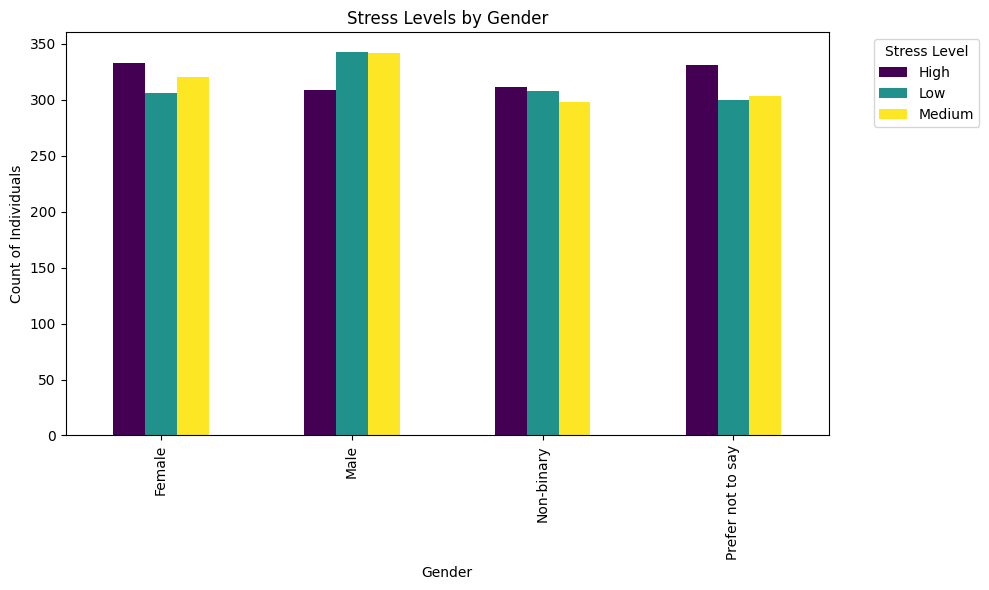

In [ ]:
# Stress Levels by Gender
stress_gender = df.groupby(['Gender', 'Stress_Level']).size().unstack(fill_value=0)
stress_gender.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Stress Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Individuals")
plt.legend(title="Stress Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-40-daa56bc39a58>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_age = df.groupby(['Age_Group', 'Stress_Level']).size().unstack(fill_value=0)


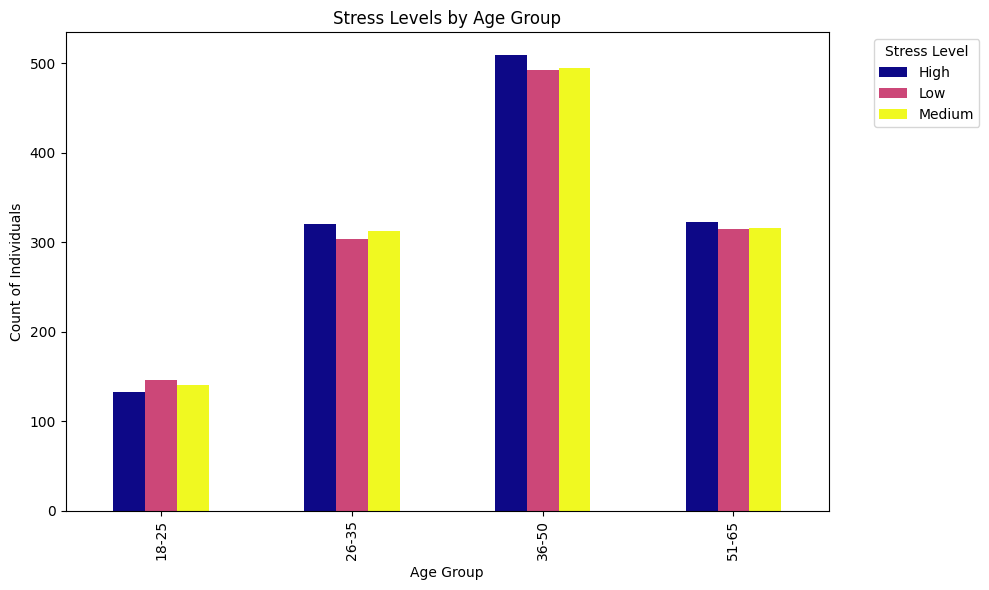

In [ ]:
# Stress Levels by Age Group
stress_age = df.groupby(['Age_Group', 'Stress_Level']).size().unstack(fill_value=0)
stress_age.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title("Stress Levels by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Individuals")
plt.legend(title="Stress Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

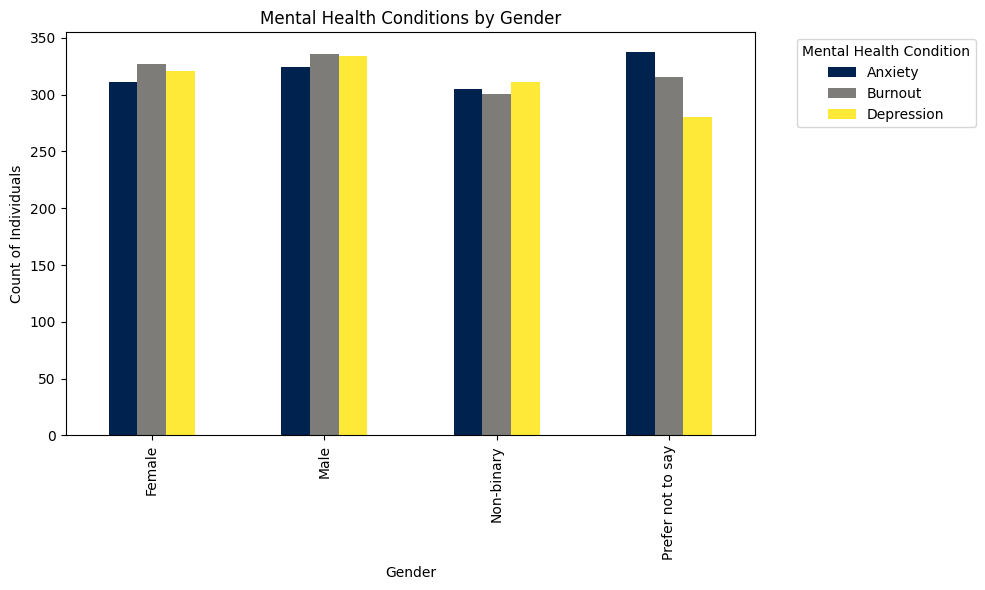

In [ ]:
# Mental Health Conditions by Gender
mental_health_gender = df.groupby(['Gender', 'Mental_Health_Condition']).size().unstack(fill_value=0)
mental_health_gender.plot(kind='bar', figsize=(10, 6), colormap='cividis')
plt.title("Mental Health Conditions by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Individuals")
plt.legend(title="Mental Health Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-42-faa547f3600c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_age = df.groupby(['Age_Group', 'Mental_Health_Condition']).size().unstack(fill_value=0)


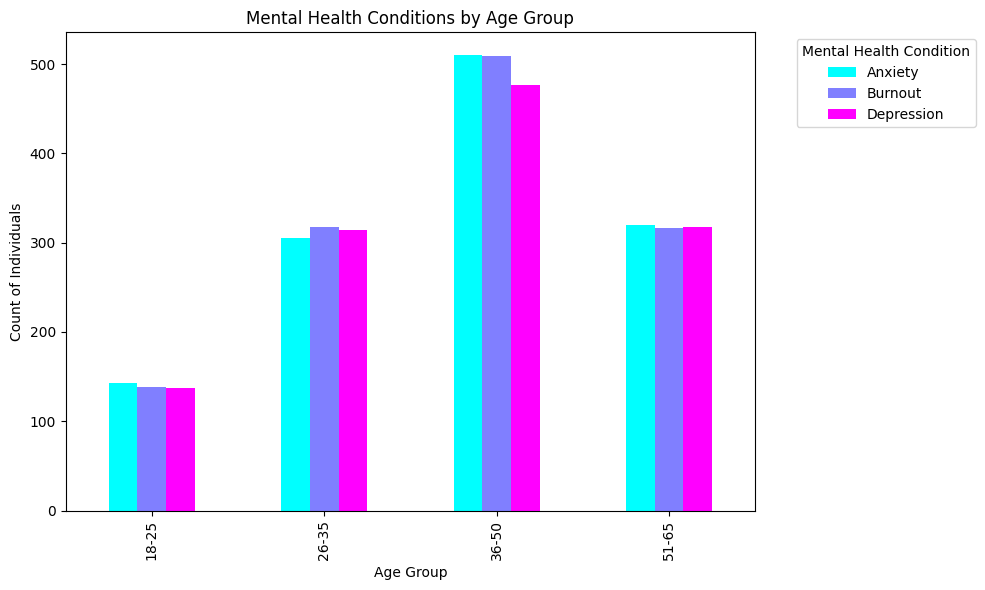

In [ ]:
# Mental Health Conditions by Age Group
mental_health_age = df.groupby(['Age_Group', 'Mental_Health_Condition']).size().unstack(fill_value=0)
mental_health_age.plot(kind='bar', figsize=(10, 6), colormap='cool')
plt.title("Mental Health Conditions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Individuals")
plt.legend(title="Mental Health Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Or export as an Excel file
cleaned_data_path_excel = "cleaned_data.xlsx"
df.to_excel(cleaned_data_path_excel, index=False)

# Summarized findings

**Work Location and Stress Levels:**

Remote workers experience higher satisfaction with work-life balance but report increased social isolation and stress due to extended virtual meetings and lack of face-to-face interaction.
Hybrid models exhibit a balance between satisfaction and lower stress levels, suggesting this model could serve as a baseline for optimized employee well-being.

**Impact of Job Role and Industry:**

Stress levels vary significantly by job roles and industries. Roles requiring intensive collaboration (e.g., IT and healthcare) report higher stress.
Industries with established mental health support (e.g., healthcare) show relatively lower stress compared to others like manufacturing.

**Demographics and Mental Health:**

Younger employees (18-25) report higher stress levels and mental health conditions like anxiety, possibly due to career pressures and work expectations.
Gender-based findings indicate that women and non-binary employees are more likely to report mental health issues than men, pointing to potential gaps in gender-sensitive support initiatives.

**Access to Mental Health Resources:**

Employees with access to mental health resources report better stress management and job satisfaction. However, gaps exist where employees either lack access or awareness of available resources.

**Social Isolation and Satisfaction:**

High social isolation ratings correlate with dissatisfaction in remote setups, highlighting the need for virtual engagement initiatives and team-building exercises.

# Recommendations

**Promote Hybrid Work Models:**

Encourage hybrid setups for roles that allow it, leveraging the balance between autonomy and collaboration.

**Targeted Mental Health Programs:**

Focus on younger demographics and women, offering counseling services, stress management workshops, and peer support groups.
Develop gender-sensitive policies to address unique challenges.

**Improve Access to Mental Health Resources:**

Ensure all employees have clear and equitable access to mental health resources through internal communications, portals, and campaigns.

**Industry-Specific Interventions:**

Customize mental health and stress-reduction programs to align with the unique challenges of each industry and job role.

**Combat Social Isolation:**

Invest in virtual team-building activities and platforms for casual communication.
Train managers to maintain regular check-ins and foster a sense of belonging.

**Monitor and Adjust:**

Continuously analyze stress and satisfaction metrics through surveys and pulse checks to refine policies and strategies.

#Conclusions

The analysis underscores the critical need to address mental health challenges in remote work settings to enhance employee well-being and productivity. Remote work, while offering flexibility and autonomy, often increases stress levels and exacerbates feelings of social isolation. These challenges directly impact job satisfaction and can hinder organizational performance if left unaddressed.

Key insights reveal that:



*   Remote workers face higher stress and isolation, with younger employees and women being particularly affected.
*   Hybrid work arrangements offer a balanced approach, reducing stress and improving overall satisfaction.
*  Industries with high job demands, such as IT and healthcare, require specialized mental health interventions.



